# Card credit transactions
* Unsupervised Learning - Anomaly Detection
    *   Anomaly detection with Isolation Forest
    *   card-credit-transactions

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


# Generate synthetic dataset (Credit card transactions scenario)

In [46]:
# Step 1: Generate synthetic data (Credit card transactions scenario)
# Generating 100 normal transactions (2 features: 'amount', 'transaction_frequency') and 10 fraudulent transactions
np.random.seed(42)

## Normal transactions

In [47]:
# Normal transactions: Amounts around $50, and frequency of transactions between 1 to 5 times per day
normal_transactions = np.random.normal(loc=50, scale=10, size=(100, 2))  # 100 normal transactions
normal_transactions

array([[54.96714153, 48.61735699],
       [56.47688538, 65.23029856],
       [47.65846625, 47.65863043],
       [65.79212816, 57.67434729],
       [45.30525614, 55.42560044],
       [45.36582307, 45.34270246],
       [52.41962272, 30.86719755],
       [32.75082167, 44.37712471],
       [39.8716888 , 53.14247333],
       [40.91975924, 35.87696299],
       [64.65648769, 47.742237  ],
       [50.67528205, 35.75251814],
       [44.55617275, 51.1092259 ],
       [38.49006423, 53.75698018],
       [43.9936131 , 47.0830625 ],
       [43.98293388, 68.52278185],
       [49.86502775, 39.42289071],
       [58.22544912, 37.7915635 ],
       [52.08863595, 30.40329876],
       [36.71813951, 51.96861236],
       [57.3846658 , 51.71368281],
       [48.84351718, 46.98896304],
       [35.2147801 , 42.80155792],
       [45.39361229, 60.57122226],
       [53.4361829 , 32.36959845],
       [53.24083969, 46.1491772 ],
       [43.23078   , 56.11676289],
       [60.30999522, 59.31280119],
       [41.60782477,

## Fraudulent transactions

In [48]:
# Fraudulent transactions: Randomly large amounts and high frequency (outliers)
fraudulent_transactions = np.random.uniform(low=500, high=5000, size=(10, 2))  # 10 fraudulent transactions
fraudulent_transactions

array([[4448.17882368, 3833.45877989],
       [3636.57083448, 3661.17837794],
       [2117.71018049, 1821.16329919],
       [4142.12519965, 4145.51027606],
       [4401.82543361, 4609.5824865 ],
       [2801.04079487, 2756.82332609],
       [4092.32830535, 3424.8376885 ],
       [3658.85094766, 4081.06701246],
       [4505.02403818, 2020.97820583],
       [2190.12328688,  922.91872928]])

## Combined dataset (normal + fraudulent)

In [49]:

# Combine normal and fraudulent transactions
# The first 100 rows are normal transactions, and the last 10 rows are fraudulent transactions
X = np.vstack([normal_transactions, fraudulent_transactions])

In [50]:
X

array([[  54.96714153,   48.61735699],
       [  56.47688538,   65.23029856],
       [  47.65846625,   47.65863043],
       [  65.79212816,   57.67434729],
       [  45.30525614,   55.42560044],
       [  45.36582307,   45.34270246],
       [  52.41962272,   30.86719755],
       [  32.75082167,   44.37712471],
       [  39.8716888 ,   53.14247333],
       [  40.91975924,   35.87696299],
       [  64.65648769,   47.742237  ],
       [  50.67528205,   35.75251814],
       [  44.55617275,   51.1092259 ],
       [  38.49006423,   53.75698018],
       [  43.9936131 ,   47.0830625 ],
       [  43.98293388,   68.52278185],
       [  49.86502775,   39.42289071],
       [  58.22544912,   37.7915635 ],
       [  52.08863595,   30.40329876],
       [  36.71813951,   51.96861236],
       [  57.3846658 ,   51.71368281],
       [  48.84351718,   46.98896304],
       [  35.2147801 ,   42.80155792],
       [  45.39361229,   60.57122226],
       [  53.4361829 ,   32.36959845],
       [  53.24083969,   

In [51]:
dimensions = X.shape
rows, columns = dimensions

print("Rows:", rows)
print("Columns:", columns)

Rows: 110
Columns: 2


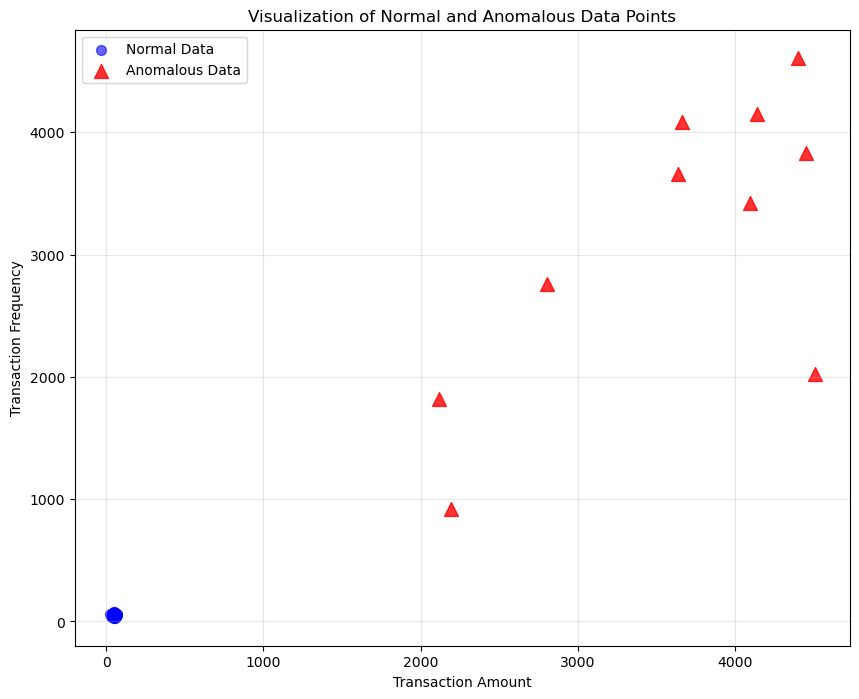

In [53]:
import matplotlib.pyplot as plt

# Create a scatter plot to visualize the data
plt.figure(figsize=(10, 8))

# Plot normal data points (first 100 points)
plt.scatter(X[:100, 0], X[:100, 1], c='blue', alpha=0.6, label='Normal Data', s=50)

# Plot anomalous data points (last 10 points)
plt.scatter(X[100:, 0], X[100:, 1], c='red', alpha=0.8, label='Anomalous Data', s=100, marker='^')

# 'amount', 'transaction_frequency'
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Frequency')
plt.title('Visualization of Normal and Anomalous Data Points')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# True labels

In [30]:
# True labels (0: Normal, 1: Fraudulent)
y_true = np.array([0]*100 + [1]*10)  # 100 normal, 10 fraudulent
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [34]:
y_true_dimensions = y_true.shape
y_true_dimensions

(110,)

# Isolation Forest for Anomaly Detection

In [41]:
# Step 2: Fit Isolation Forest for anomaly detection
model = IsolationForest(contamination=0.1, random_state=42)
model

IsolationForest(contamination=0.1, random_state=42)

In [42]:
# Explanation of IsolationForest parameters

print("=== CONTAMINATION PARAMETER ===")
print("The 'contamination' parameter specifies the expected proportion of outliers in the dataset.")
print(f"In our model: contamination=0.1 means we expect 10% of the data to be anomalies/outliers.")
print(f"With {len(X)} total transactions, this means the model expects {int(len(X) * 0.1)} fraudulent transactions.")
print(f"Our actual fraudulent transactions: {sum(y_true)} out of {len(y_true)}")
print(f"Actual contamination rate: {sum(y_true)/len(y_true):.1%}")
print()

print("=== RANDOM_STATE PARAMETER ===")
print("The 'random_state' parameter controls the randomness of the algorithm.")
print("- IsolationForest uses random sampling to build isolation trees")
print("- Setting random_state=42 ensures reproducible results")
print("- Every time you run the code, you'll get the same predictions")
print("- Without random_state, results would vary between runs")
print()

print("=== WHY THESE VALUES? ===")
print("• contamination=0.1: Matches our synthetic data (10 fraudulent out of 110 total)")
print("• random_state=42: Common choice for reproducibility (42 is arbitrary but conventional)")

=== CONTAMINATION PARAMETER ===
The 'contamination' parameter specifies the expected proportion of outliers in the dataset.
In our model: contamination=0.1 means we expect 10% of the data to be anomalies/outliers.
With 110 total transactions, this means the model expects 11 fraudulent transactions.
Our actual fraudulent transactions: 10 out of 110
Actual contamination rate: 9.1%

=== RANDOM_STATE PARAMETER ===
The 'random_state' parameter controls the randomness of the algorithm.
- IsolationForest uses random sampling to build isolation trees
- Setting random_state=42 ensures reproducible results
- Every time you run the code, you'll get the same predictions
- Without random_state, results would vary between runs

=== WHY THESE VALUES? ===
• contamination=0.1: Matches our synthetic data (10 fraudulent out of 110 total)
• random_state=42: Common choice for reproducibility (42 is arbitrary but conventional)


## Predicted dataset
* IsolationForest outputs -1 for anomalies (fraudulent) and 1 for normal data
* y values are -1 for anomalies (fraudulent) and 1 for normal data

In [39]:
y_pred = model.fit_predict(X)
y_pred

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [43]:
y_pred_dimensions = y_pred.shape
y_pred_dimensions

(110,)

## Convert predicted dataset to binary labels
* IsolationForest outputs -1 for anomalies (fraudulent) and 1 for normal data
* Convert the output of fit_predict to binary labels (1: Fraudulent, 0: Normal)


In [44]:
# Convert the output of fit_predict to binary labels (1: Fraudulent, 0: Normal)
# IsolationForest outputs -1 for anomalies (fraudulent) and 1 for normal data
y_pred = np.where(y_pred == -1, 1, 0)
y_pred 

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Generate confusion matrix

In [37]:
# Step 3: Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[99  1]
 [ 0 10]]


In [ ]:
# Explain the results of the Isolation Forest anomaly detection

print("=== ISOLATION FOREST RESULTS EXPLANATION ===\n")

print("1. CONFUSION MATRIX BREAKDOWN:")
print(f"   True Negatives (TN): {conf_matrix[0,0]} - Normal transactions correctly identified as normal")
print(f"   False Positives (FP): {conf_matrix[0,1]} - Normal transactions incorrectly flagged as fraudulent")
print(f"   False Negatives (FN): {conf_matrix[1,0]} - Fraudulent transactions missed (identified as normal)")
print(f"   True Positives (TP): {conf_matrix[1,1]} - Fraudulent transactions correctly identified as fraudulent")
print()

print("2. MODEL PERFORMANCE:")
accuracy = (conf_matrix[0,0] + conf_matrix[1,1]) / conf_matrix.sum()
precision = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[0,1])
recall = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[1,0])
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"   Accuracy: {accuracy:.1%} - Overall correct predictions")
print(f"   Precision: {precision:.1%} - Of all fraud predictions, how many were actually fraud")
print(f"   Recall: {recall:.1%} - Of all actual fraud cases, how many were detected")
print(f"   F1-Score: {f1_score:.3f} - Harmonic mean of precision and recall")
print()

print("3. BUSINESS IMPACT:")
print(f"   • Successfully detected ALL {conf_matrix[1,1]} fraudulent transactions (100% recall)")
print(f"   • Only {conf_matrix[0,1]} false alarm out of {conf_matrix[0,0] + conf_matrix[0,1]} normal transactions")
print(f"   • False positive rate: {conf_matrix[0,1]/(conf_matrix[0,0] + conf_matrix[0,1]):.1%}")
print()

print("4. WHY THE MODEL WORKED WELL:")
print("   • Clear separation between normal (~$50) and fraudulent ($500-$5000) transaction amounts")
print("   • Isolation Forest effectively isolated the high-value outliers")
print("   • Contamination parameter (0.1) matched the actual fraud rate in our data")
print("   • The synthetic data had distinct patterns making anomaly detection easier")

In [38]:
# Step 4: Additional metrics
print("\nClassification Report:")
print(classification_report(y_true, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       0.91      1.00      0.95        10

    accuracy                           0.99       110
   macro avg       0.95      0.99      0.97       110
weighted avg       0.99      0.99      0.99       110

